In [2]:
from typing import Dict, List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
objectives = ["mml_basic", "pg_zscore", "pg_basic", "mml_zscore"]
policies = ["off_policy", "on_policy"]
sampling_algorithms = ["mixed", "top_p", "beam_search"]
seeds = ["12321", "11", "1993", "42", "2023"]

experiment_results: Dict[str, List[np.array]] = {}
experiment_steps: Dict[str, List[np.array]] = {}
for obj in objectives:
    for pol in policies:
        for sample_alg in sampling_algorithms:
            experiment_results[f"{obj}_{pol}_{sample_alg}"] = []
            experiment_steps[f"{obj}_{pol}_{sample_alg}"] = []
            for seed in seeds:
                path = "ablation-results-july-24"
                file = f"{path}/sst2_2_128_all_finetune_{seed}_0.00001_0_1_0_{obj}_{pol}_{sample_alg}_accuracy_0.6.csv"
                try:
                    df = pd.read_csv(file)
                    step_arr = df["Step"].tolist()
                    performance_arr = df["Value"].tolist()
                    experiment_steps[f"{obj}_{pol}_{sample_alg}"].append(np.array(step_arr[:95]))
                    experiment_results[f"{obj}_{pol}_{sample_alg}"].append(np.array(performance_arr[:95]))
                except Exception as e:
                    print("not found", e)
                    continue


def experiment_to_numpy(experiment_name: str) -> Tuple[np.array, np.array, np.array, np.array]:
    select_indices = [x for x in range(len(experiment_steps[experiment_name][0])) if x % 1 == 0]
    x = np.array(experiment_steps[experiment_name][0][select_indices])
    y = np.array(experiment_results[experiment_name]) * 100.00
    print(experiment_name, x.shape, y.shape)
    mean_y = np.mean(y, axis=0)[select_indices]
    std_y = np.std(y, axis=0)[select_indices]
    return x, y, mean_y, std_y


experiment_means = {exp_name: experiment_to_numpy(exp_name)[2] for exp_name in experiment_results.keys()}
experiment_stds = {exp_name: experiment_to_numpy(exp_name)[3] for exp_name in experiment_results.keys()}
experiment_steps = {exp_name: experiment_to_numpy(exp_name)[0] for exp_name in experiment_results.keys()}

mml_basic_off_policy_mixed (95,) (5, 95)
mml_basic_off_policy_top_p (95,) (5, 95)
mml_basic_off_policy_beam_search (95,) (5, 95)
mml_basic_on_policy_mixed (95,) (5, 95)
mml_basic_on_policy_top_p (95,) (5, 95)
mml_basic_on_policy_beam_search (95,) (5, 95)
pg_zscore_off_policy_mixed (95,) (5, 95)
pg_zscore_off_policy_top_p (95,) (5, 95)
pg_zscore_off_policy_beam_search (95,) (5, 95)
pg_zscore_on_policy_mixed (95,) (5, 95)
pg_zscore_on_policy_top_p (95,) (5, 95)
pg_zscore_on_policy_beam_search (95,) (5, 95)
pg_basic_off_policy_mixed (95,) (5, 95)
pg_basic_off_policy_top_p (95,) (5, 95)
pg_basic_off_policy_beam_search (95,) (5, 95)
pg_basic_on_policy_mixed (95,) (5, 95)
pg_basic_on_policy_top_p (95,) (5, 95)
pg_basic_on_policy_beam_search (95,) (5, 95)
mml_zscore_off_policy_mixed (95,) (5, 95)
mml_zscore_off_policy_top_p (95,) (5, 95)
mml_zscore_off_policy_beam_search (95,) (5, 95)
mml_zscore_on_policy_mixed (95,) (5, 95)
mml_zscore_on_policy_top_p (95,) (5, 95)
mml_zscore_on_policy_beam_s

In [4]:
colors = {
    "mml_basic_off_policy_beam_search": "black",
    "mml_basic_off_policy_top_p": "blue",
    "mml_basic_off_policy_mixed": "green",
    "mml_zscore_off_policy_beam_search": "red",
    "mml_zscore_off_policy_top_p": "orange",
    "mml_zscore_off_policy_mixed": "purple",
    "pg_basic_off_policy_beam_search": "brown",
    "pg_basic_off_policy_top_p": "navy",
    "pg_basic_off_policy_mixed": "pink",
    "pg_zscore_off_policy_beam_search": "goldenrod",
    "pg_zscore_off_policy_top_p": "orchid",
    "pg_zscore_off_policy_mixed": "lime",
    "pg_basic_on_policy_beam_search": "cyan",
    "pg_basic_on_policy_top_p": "lime",
    "pg_basic_on_policy_mixed": "pink",
    "pg_zscore_on_policy_beam_search": "cyan",
    "pg_zscore_on_policy_top_p": "slategray",
    "pg_zscore_on_policy_mixed": "pink",
    "mml_basic_on_policy_beam_search": "blue",
    "mml_basic_on_policy_top_p": "khaki",
    "mml_basic_on_policy_mixed": "orchid",
    "mml_zscore_on_policy_beam_search": "orange",
    "mml_zscore_on_policy_top_p": "navy",
    "mml_zscore_on_policy_mixed": "teal",
}

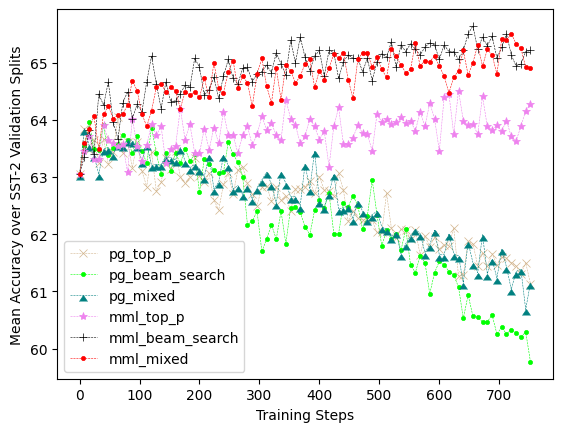

In [5]:
# comparison of tech decoding techniques.
fig = plt.figure()

experiments_to_see = [
    "top_p",
    "beam_search",
    "mixed",
]

local_colors = ["tan", "lime", "teal", "violet", "black", "red", "blue", "green"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--"]
markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    avg_dims = ["pg_zscore_off_policy", "pg_zscore_on_policy", "pg_basic_on_policy", "pg_basic_off_policy"]
    means = 0.0
    for avg_dim in avg_dims:
        means += experiment_means[f"{avg_dim}_{exp}"]
    plt.plot(
        experiment_steps["pg_zscore_off_policy_beam_search"],
        means / 4.0,
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.4,
        label="pg_" + exp,
        linestyle=linestyles[idx],
        markeredgewidth=0.5,
    )

for idx, exp in enumerate(experiments_to_see):
    avg_dims = ["mml_basic_on_policy", "mml_basic_off_policy", "mml_zscore_on_policy", "mml_zscore_off_policy"]
    means = 0.0
    for avg_dim in avg_dims:
        means += experiment_means[f"{avg_dim}_{exp}"]
    plt.plot(
        experiment_steps["mml_basic_off_policy_beam_search"],
        means / 4.0,
        color=local_colors[idx + 3],
        marker=markers[idx + 3],
        linewidth=0.4,
        label="mml_" + exp,
        linestyle=linestyles[idx + 3],
        markeredgewidth=0.5,
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("decoding_methods.svg", format="svg", dpi=1200)

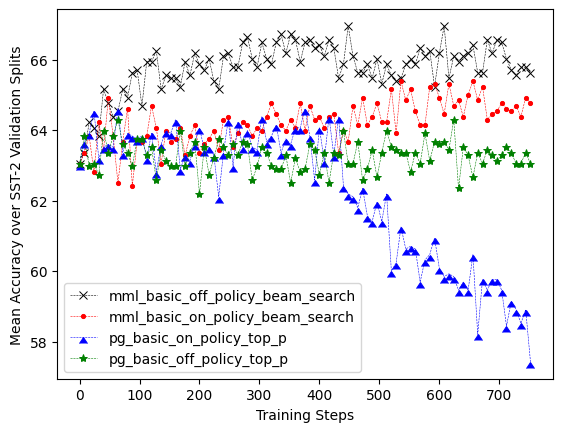

In [11]:
# is pg better than mml?

fig = plt.figure()

experiments_to_see = [
    "mml_basic_off_policy_beam_search",
    "mml_basic_on_policy_beam_search",
    "pg_basic_on_policy_top_p",
    "pg_basic_off_policy_top_p",
]
local_colors = ["black", "red", "blue", "green"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=local_colors[idx],
        marker=markers[idx],
        linewidth=0.4,
        label=exp,
        markeredgewidth=0.7,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("mml_vs_pg.svg", format="svg", dpi=1200)

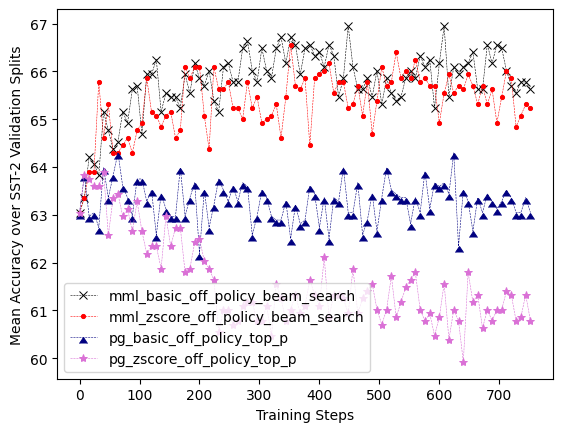

In [8]:
"""
# is pg better than mml?

fig = plt.figure()

experiments_to_see = [
    "mml_basic_off_policy_beam_search",
    "mml_zscore_off_policy_beam_search",
    #"mml_zscore_on_policy_beam_search",
    #"mml_basic_on_policy_beam_search",
    #"pg_basic_on_policy_top_p",
    "pg_basic_off_policy_top_p",
    #"pg_zscore_on_policy_top_p",
    "pg_zscore_off_policy_top_p",
]
# local_colors = ["tan", "lime", "teal", "violet", "black", "red", "blue", "green"]
linestyles = ["--", "--", "--", "--", "--", "--", "--", "--"]

markers = ["x", ".", 6, "*", "+", ".", "v", "1", "2", "3"]
for idx, exp in enumerate(experiments_to_see):
    plt.plot(
        experiment_steps[exp],
        experiment_means[exp],
        color=colors[exp],
        marker=markers[idx],
        linewidth=0.4,
        label=exp,
        markeredgewidth=0.7,
        linestyle=linestyles[idx],
    )

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Accuracy over SST-2 Validation Splits")

plt.show()
fig.savefig("mml_vs_pg.svg", format="svg", dpi=1200)
"""